## Outliers - MinMax ##

In [1]:
# Importing useful packages
# Importing useful packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import kurtosis, skew
from sklearn import datasets
from scipy.stats import iqr
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler

# Read in the csv file
data = pd.read_csv("../ReadyDF", header=0, index_col=0)
data.head(2)

,I1,I2,I3,P_IPO,P_H,P_L,P_1Day,C1,C2,C4,...,C5',C6',T3',T4',T5',S1',S2',S3',Y1,Y2
0,AATI,ADVANCED ANALOGIC TECHNOLOGIES INC,3674,10.0,9.5,8.5,11.87,122.0,1.0,0.029074,...,3.864345,900.0,0.908876,0.640426,0.054250,0.004875,0.009199,0.010929,0,1
1,ABPI,ACCENTIA BIOPHARMACEUTICALS INC,2834,8.0,10.0,8.0,7.25,259.0,0.0,-0.013352,...,12.028832,0.0,0.898724,0.644753,0.051395,0.003258,0.011105,0.010876,1,0


In [2]:
# Creating a target variables
targets = data.iloc[:,:7]
print(targets.head(2))

targets2 = data.iloc[:,20:22]
print(targets2.head(2))

     I1                                  I2    I3  P_IPO   P_H  P_L  P_1Day
0  AATI  ADVANCED ANALOGIC TECHNOLOGIES INC  3674   10.0   9.5  8.5   11.87
1  ABPI     ACCENTIA BIOPHARMACEUTICALS INC  2834    8.0  10.0  8.0    7.25
   Y1  Y2
0   0   1
1   1   0


In [3]:
# Concatinate the target variables together into `Targets`
Targets = pd.concat([targets,targets2], axis=1, join_axes=[data.index])
data = data.drop(['I1','I2','I3','P_IPO','P_H','P_L','P_1Day','Y1','Y2'], axis=1)
print(data.head(2))

      C1   C2        C4      C7  C3'        C5'    C6'       T3'       T4'  \
0  122.0  1.0  0.029074  51.345    1   3.864345  900.0  0.908876  0.640426   
1  259.0  0.0 -0.013352  25.936    0  12.028832    0.0  0.898724  0.644753   

        T5'       S1'       S2'       S3'  
0  0.054250  0.004875  0.009199  0.010929  
1  0.051395  0.003258  0.011105  0.010876  


In [4]:
# Checking the Mean before fixing outliers
data.mean()

C1     148.350440
C2       0.863636
C4       0.007342
C7     458.587321
C3'      0.529326
C5'      4.625317
C6'    608.907625
T3'      0.915750
T4'      0.628061
T5'      0.080699
S1'      0.005504
S2'      0.009181
S3'      0.011857
dtype: float64

## Outliers - IQR ##

{'whiskers': [<matplotlib.lines.Line2D at 0x7f66eaa87978>,
 'caps': [<matplotlib.lines.Line2D at 0x7f66eaa1e048>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f66eaa87828>],
 'medians': [<matplotlib.lines.Line2D at 0x7f66eaa1e6d8>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f66eaa1ea20>],
 'means': []}

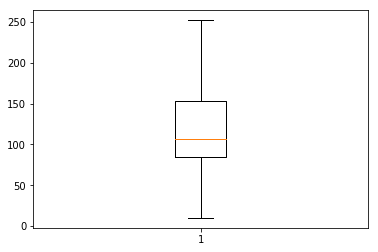

In [5]:
# Defining the function 'iqr_outliers' to help with outliers

def iqr_outliers(x):
    if x > (Q3 + (1.5*IQR)):
        x=Q3
    elif x <(Q1 - (1.5*IQR)):
        x=Q1
    else:
        pass
    return(x)

Q1 = data['C1'].quantile(0.25)
Q3 = data['C1'].quantile(0.75)
IQR = iqr(data['C1'])
data['C1']=data['C1'].apply(lambda x: iqr_outliers(x))

# Plotting box plots for identifying outliers
plt.boxplot(data.C1)

{'whiskers': [<matplotlib.lines.Line2D at 0x7f66ea995390>,
 'caps': [<matplotlib.lines.Line2D at 0x7f66ea995a20>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f66ea995240>],
 'medians': [<matplotlib.lines.Line2D at 0x7f66ea99d0f0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f66ea99d438>],
 'means': []}

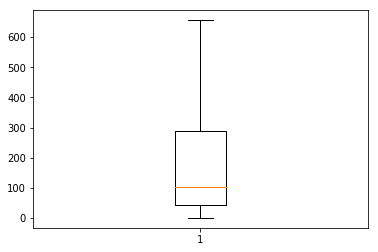

In [6]:
Q1 = data['C7'].quantile(0.25)
Q3 = data['C7'].quantile(0.75)
IQR = iqr(data['C7'])
data['C7']=data['C7'].apply(lambda x: iqr_outliers(x))

# Plotting box plots for identifying outliers
plt.boxplot(data.C7)

{'whiskers': [<matplotlib.lines.Line2D at 0x7f66ea9718d0>,
 'caps': [<matplotlib.lines.Line2D at 0x7f66ea971f60>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f66ea971780>],
 'medians': [<matplotlib.lines.Line2D at 0x7f66ea97c630>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f66ea97c978>],
 'means': []}

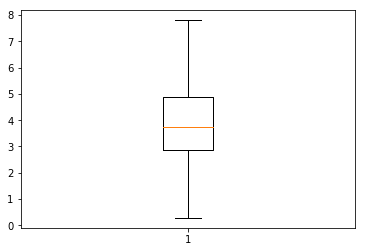

In [7]:
Q1 = data["C5'"].quantile(0.25)
Q3 = data["C5'"].quantile(0.75)
IQR = iqr(data["C5'"])
data["C5'"]=data["C5'"].apply(lambda x: iqr_outliers(x))

# Plotting box plots for identifying outliers
plt.boxplot(data["C5'"])

{'whiskers': [<matplotlib.lines.Line2D at 0x7f66ea8dc5c0>,
 'caps': [<matplotlib.lines.Line2D at 0x7f66ea8dcc50>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f66ea8dc470>],
 'medians': [<matplotlib.lines.Line2D at 0x7f66ea8e5320>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f66ea8e5668>],
 'means': []}

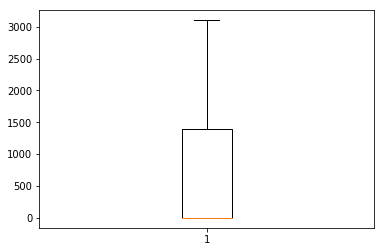

In [8]:
Q1 = data["C6'"].quantile(0.25)
Q3 = data["C6'"].quantile(0.75)
IQR = iqr(data["C6'"])
data["C6'"]=data["C6'"].apply(lambda x: iqr_outliers(x))

# Plotting box plots for identifying outliers
plt.boxplot(data["C6'"])

{'whiskers': [<matplotlib.lines.Line2D at 0x7f66ea8b66d8>,
 'caps': [<matplotlib.lines.Line2D at 0x7f66ea8b6d68>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f66ea8b6588>],
 'medians': [<matplotlib.lines.Line2D at 0x7f66ea8c1438>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f66ea8c1780>],
 'means': []}

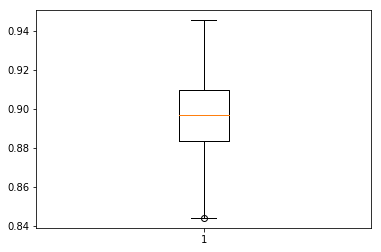

In [9]:
Q1 = data["T3'"].quantile(0.25)
Q3 = data["T3'"].quantile(0.75)
IQR = iqr(data["T3'"])
data["T3'"]=data["T3'"].apply(lambda x: iqr_outliers(x))

# Plotting box plots for identifying outliers
plt.boxplot(data["T3'"])

{'whiskers': [<matplotlib.lines.Line2D at 0x7f66ea8943c8>,
 'caps': [<matplotlib.lines.Line2D at 0x7f66ea894a58>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f66ea894278>],
 'medians': [<matplotlib.lines.Line2D at 0x7f66ea81e128>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f66ea81e470>],
 'means': []}

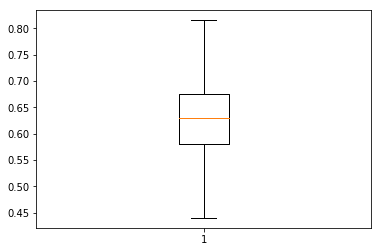

In [10]:
Q1 = data["T4'"].quantile(0.25)
Q3 = data["T4'"].quantile(0.75)
IQR = iqr(data["T4'"])
data["T4'"]=data["T4'"].apply(lambda x: iqr_outliers(x))

# Plotting box plots for identifying outliers
plt.boxplot(data["T4'"])

{'whiskers': [<matplotlib.lines.Line2D at 0x7f66ea7ec9e8>,
 'caps': [<matplotlib.lines.Line2D at 0x7f66ea7f90b8>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f66ea7ec898>],
 'medians': [<matplotlib.lines.Line2D at 0x7f66ea7f9748>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f66ea7f9a90>],
 'means': []}

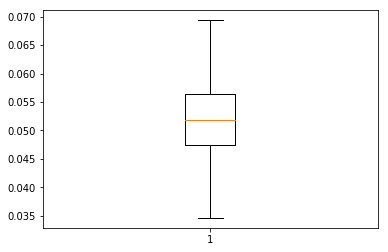

In [11]:
Q1 = data["T5'"].quantile(0.25)
Q3 = data["T5'"].quantile(0.75)
IQR = iqr(data["T5'"])
data["T5'"]=data["T5'"].apply(lambda x: iqr_outliers(x))

# Plotting box plots for identifying outliers
plt.boxplot(data["T5'"])

{'whiskers': [<matplotlib.lines.Line2D at 0x7f66ea7b0080>,
 'caps': [<matplotlib.lines.Line2D at 0x7f66ea7b06d8>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f66ea7caef0>],
 'medians': [<matplotlib.lines.Line2D at 0x7f66ea7b0d68>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f66ea75e0f0>],
 'means': []}

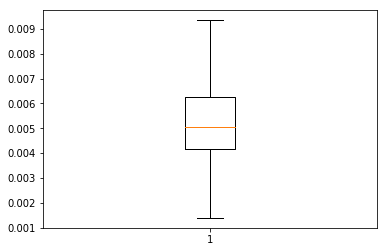

In [12]:
Q1 = data["S1'"].quantile(0.25)
Q3 = data["S1'"].quantile(0.75)
IQR = iqr(data["S1'"])
data["S1'"]=data["S1'"].apply(lambda x: iqr_outliers(x))

# Plotting box plots for identifying outliers
plt.boxplot(data["S1'"])

{'whiskers': [<matplotlib.lines.Line2D at 0x7f66ea72eb00>,
 'caps': [<matplotlib.lines.Line2D at 0x7f66ea7391d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f66ea72e9b0>],
 'medians': [<matplotlib.lines.Line2D at 0x7f66ea739860>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f66ea739ba8>],
 'means': []}

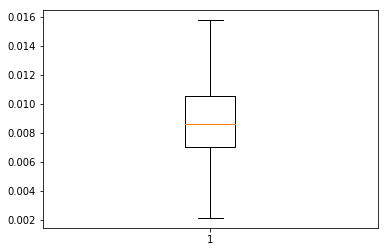

In [13]:
Q1 = data["S2'"].quantile(0.25)
Q3 = data["S2'"].quantile(0.75)
IQR = iqr(data["S2'"])
data["S2'"]=data["S2'"].apply(lambda x: iqr_outliers(x))

# Plotting box plots for identifying outliers
plt.boxplot(data["S2'"])

{'whiskers': [<matplotlib.lines.Line2D at 0x7f66ea713160>,
 'caps': [<matplotlib.lines.Line2D at 0x7f66ea7137f0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f66ea70afd0>],
 'medians': [<matplotlib.lines.Line2D at 0x7f66ea713e80>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f66ea69e208>],
 'means': []}

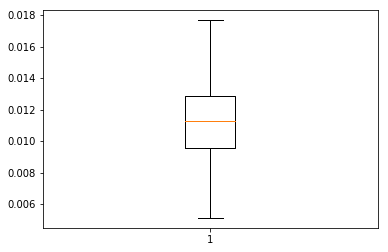

In [14]:
Q1 = data["S3'"].quantile(0.25)
Q3 = data["S3'"].quantile(0.75)
IQR = iqr(data["S3'"])
data["S3'"]=data["S3'"].apply(lambda x: iqr_outliers(x))

# Plotting box plots for identifying outliers
plt.boxplot(data["S3'"])

In [16]:
# Checking the mean after fixing outliers
data.mean()

C1     115.363270
C2       0.863636
C4       0.007342
C7     154.910100
C3'      0.529326
C5'      3.853964
C6'    588.819648
T3'      0.895960
T4'      0.628948
T5'      0.052013
S1'      0.005205
S2'      0.008789
S3'      0.011299
dtype: float64

In [15]:
# Exporting Outliers to csv file
data.to_csv("ReadyDF_Outliers",",")